# **Redes neuronales completamente conectadas aplicadas en MNIST reconocimiento  de dígitos manuscritos
**

  1. Carga del conjunto de datos MNIST

In [4]:
import keras
#Carga del conjunto de datos MNIST
mnist = keras.datasets.mnist
#Carga la division de entrenamiento y preba del conjunto de datos MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

  2. Visualizacion de una muestra

Label:  1
Image:
   [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   

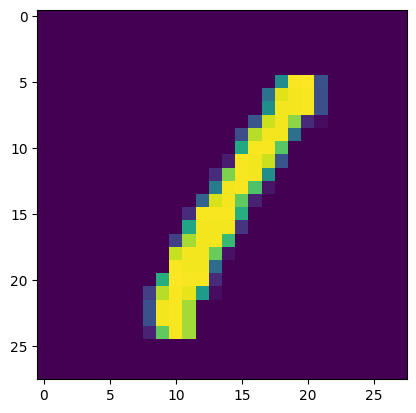

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Poner aqui entre 0 y 59999
index = 3
#  imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print (f'Label:  {training_labels[index]}')
print (f'Image:\n   {training_images[index]}')
# Visualiza la imagen
plt.imshow(training_images[index])


  3. Normalizacion de datos
  Normaliza los valores de píxeles de las imágenes dividiendo por 255.0, lo que asegura que
los valores estén en el rango [0, 1].

In [9]:
#Normalizacion de datos del tren y probar las imagenes
training_images = training_images/255.0
test_images = test_images /255.0

  4. Construccion del modelo

In [12]:
# Cosntruir el modelo de clasificacion
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10,activation='softmax')])

  5. Compilacion del modelo
  

In [13]:
#Compilacion del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


  6. Entrenamiento del modelo

In [14]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2582 - accuracy: 0.9261
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1104 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0771 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0572 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0451 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0359 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0273 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0240 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0188 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

  7. Graficar el historial del entrenamiento

<Axes: >

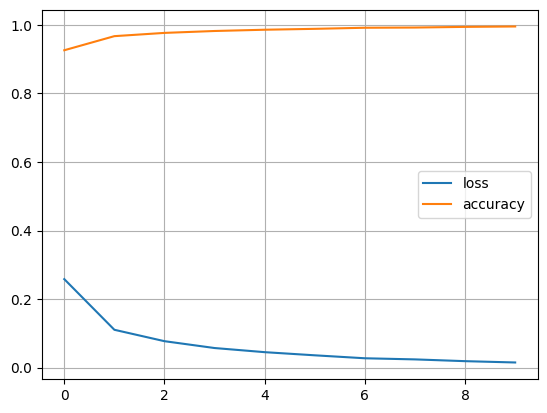

In [18]:
  # Graficar el historial del entrenamiento
  import pandas as pd
  df = pd.DataFrame()
  pd.DataFrame(history.history).plot(grid=True)

  8. Evaluacion del modelo


In [20]:
# Evaluacion del modelo
loss, accuracy = model.evaluate(training_images, training_labels)
print ("Perdida en el conjunto de entrenamiento: ", loss)
print ("Prescision en el conjuno de entrenamiento:" , accuracy)

# Evaluacion del modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print ("Perdida en el conjunto de pruebas: ", loss)
print ("Prescision en el conjuno de pruebas:" , accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - accuracy: 0.9970
Perdida en el conjunto de entrenamiento:  0.010449615307152271
Prescision en el conjuno de entrenamiento: 0.9970333576202393
313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9781
Perdida en el conjunto de pruebas:  0.07912515848875046
Prescision en el conjuno de pruebas: 0.9781000018119812
